In [1]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
!pip install geocoder

In [3]:
!pip install folium

In [4]:
from geopy.geocoders import Nominatim
import folium

# Reading wiki document for getting list of Neighborhoods

In [5]:
wikiurl = "https://en.wikipedia.org/wiki/Raleigh,_North_Carolina_neighborhoods"

In [6]:
#Reading page url into an object
wikipage = urllib.request.urlopen(wikiurl)

In [7]:
#Reading page using Beautiful soup
wikipage_soup = BeautifulSoup(wikipage, "lxml")

In [8]:
#Taking out all the Neighborhood names
A = []
for tag in wikipage_soup.find_all("li"):
    A.append(tag.text)
print(A)

['1 Inside the Beltline', '2 North Raleigh', '3 West Raleigh and Southwest Raleigh', '4 South and East Raleigh', 'Anderson Heights', 'Avent West', 'Belvidere Park', 'Battery Heights', 'Bloomsbury', 'Boylan Heights', 'Cameron Park', 'Cameron Village', 'Capitol District', 'Capitol Heights', 'Country Club Hills', 'Coley Forest', 'Depot District', 'Drewry Hills', 'Fayetteville Street', 'Five Points Historic Neighborhoods', 'Glenwood-Brooklyn', 'Glenwood South', 'Glenwood Village', 'Hayes Barton', 'Hi-Mount', 'Historic Oakwood', 'Longview Gardens', 'Madonna Acres', 'Maiden Lane', 'Moore Square', 'Mordecai District', 'North Carolina State University', 'Raleigh Country Club', 'Roanoke Park', 'Rochester Heights', 'South Park', 'State Government District', 'Vanguard Park', 'Victoria Place', 'Warehouse District', 'West Raleigh Historic District', 'Wayland Heights', 'Woodcrest', 'University Park', 'Bent Tree', 'Brentwood Estates', 'Brier Creek', 'Brookhaven', 'Coachmans Trail', 'Crabtree Valley',

# Creating a dataFrame of neighborhoods in Raleigh

In [9]:
#Convert above data into a DataFrame
raleigh_neigh=pd.DataFrame(A,columns=['Neighborhood'])

In [10]:
#taking out row values for actual neighborhood names
raleigh_neigh = raleigh_neigh.iloc[4:109,]
raleigh_neigh

,Neighborhood
4,Anderson Heights
5,Avent West
6,Belvidere Park
7,Battery Heights
8,Bloomsbury
...,...
104,Southgate
105,Swift Creek
106,Trailwood
107,Walnut Creek


In [11]:
#reset index of data frame
raleigh_neigh.reset_index(drop = True) 
#Final data frame with neighborhood list.

,Neighborhood
0,Anderson Heights
1,Avent West
2,Belvidere Park
3,Battery Heights
4,Bloomsbury
...,...
100,Southgate
101,Swift Creek
102,Trailwood
103,Walnut Creek


# Analysing neighborhood data in Raleigh

In [12]:
#Analysing the number of neighborhoods in Raleigh
raleigh_neigh.shape

(105, 1)

In [13]:
geolocator = Nominatim(user_agent="segment_clustering", timeout=3)

In [14]:
#Finding out latitude and longitude
location = geolocator.geocode('Anderson Heights, Raleigh, North Carolina')
print("Latitude {} and Longitude {}".format(location.latitude,location.longitude))

Latitude 35.8178634 and Longitude -78.63778241964707


In [45]:
#Run the above code for all neighborhoods in Raleigh
i = 0
for neigh in raleigh_neigh['Neighborhood']:
    location = geolocator.geocode('{}, Raleigh, North Carolina'.format(neigh))
    if(location):
        raleigh_neigh.at[i,'Latitude'] = location.latitude
        raleigh_neigh.at[i,'Longitude'] = location.longitude
    i = i+1

D:\Personal Files\Softwares\lib\site-packages\pandas\core\frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value


GeocoderTimedOut: Service timed out

In [20]:
#Analysing results for latitude and longitude
raleigh_neigh = raleigh_neigh[raleigh_neigh['Neighborhood'].notna()]
raleigh_neigh.isnull().any()

Neighborhood    False
Latitude         True
Longitude        True
dtype: bool

In [43]:
raleigh_neigh_na = raleigh_neigh[raleigh_neigh.isna().any(axis=1)]

In [44]:
#Printing neighborhood values which have latitude and longitude as NAN
raleigh_neigh_na

,Neighborhood,Latitude,Longitude
36,State Government District,NaN,NaN
40,West Raleigh Historic District,NaN,NaN
85,Wood Valley,NaN,NaN
87,Brandywine,NaN,NaN


In [23]:
#For consistency we will fill these values manually
raleigh_neigh.at[8,'Latitude'] = 35.8091
raleigh_neigh.at[8,'Longitude'] = -78.6491

raleigh_neigh.at[12,'Latitude'] = 35.7804
raleigh_neigh.at[12,'Longitude'] = -78.6391

raleigh_neigh.at[15,'Latitude'] = 35.8228
raleigh_neigh.at[15,'Longitude'] = -78.6725

raleigh_neigh.at[16,'Latitude'] = 35.7784
raleigh_neigh.at[16,'Longitude'] = -78.6435

raleigh_neigh.at[32,'Latitude'] = 35.7763
raleigh_neigh.at[32,'Longitude'] = -78.5935

raleigh_neigh.at[51,'Latitude'] = 35.9129
raleigh_neigh.at[51,'Longitude'] = -78.7434

raleigh_neigh.at[97,'Latitude'] = 35.8094
raleigh_neigh.at[97,'Longitude'] = -78.5462

raleigh_neigh.at[105,'Latitude'] = 35.7106
raleigh_neigh.at[105,'Longitude'] = -78.7249

raleigh_neigh.at[106,'Latitude'] = 35.7593
raleigh_neigh.at[106,'Longitude'] = -78.6916

raleigh_neigh.at[107,'Latitude'] = 35.7494
raleigh_neigh.at[107,'Longitude'] = -78.5763

raleigh_neigh.at[108,'Latitude'] = 35.7988
raleigh_neigh.at[108,'Longitude'] = -78.5644



In [24]:
raleigh_neigh.isnull().any()

Neighborhood    False
Latitude         True
Longitude        True
dtype: bool

In [25]:
#dropping the remaining 4 rows as latitude longitude not available
raleigh_data = raleigh_neigh[raleigh_neigh.notna()]
raleigh_data.dropna(inplace=True)

In [26]:
#Print final data for analysis from Raleigh
raleigh_data.reset_index(drop =True, inplace= True)

In [27]:
raleigh_data

,Neighborhood,Latitude,Longitude
0,Anderson Heights,35.808897,-78.648599
1,Avent West,35.774159,-78.652102
2,Belvidere Park,35.785779,-78.655470
3,Battery Heights,35.790361,-78.660413
4,Bloomsbury,35.809100,-78.649100
...,...,...,...
96,Southgate,35.800649,-78.564618
97,Swift Creek,35.710600,-78.724900
98,Trailwood,35.759300,-78.691600
99,Walnut Creek,35.749400,-78.576300


# Map view of Raleigh Neighborhoods

In [28]:
#mapping raleigh neighborhoods on a map
address = 'Raleigh, North Carolina'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Raleigh are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Raleigh are 35.7803977, -78.6390989.


In [126]:
map_dt = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, label in zip(raleigh_data['Latitude'], raleigh_data['Longitude'], raleigh_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dt)  
    
map_dt

# Implementing Foursqaure API for venue data

In [30]:
#getting credentials for Foursquare

CLIENT_ID = 'SJS2KZSN4VLUN2CC0VHJDEUPHYMD55VDC3EJ3OKZHLTI0XAW' # your Foursquare ID
CLIENT_SECRET = '0J5HHRXS3BFOQC4PBKDBYNQRVMM2FHLCHODF4FJOCJE2ZHS1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SJS2KZSN4VLUN2CC0VHJDEUPHYMD55VDC3EJ3OKZHLTI0XAW
CLIENT_SECRET:0J5HHRXS3BFOQC4PBKDBYNQRVMM2FHLCHODF4FJOCJE2ZHS1


In [31]:
import requests # library to handle requests
from pandas.io.json import json_normalize

In [32]:
neighborhood_latitude = raleigh_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = raleigh_data.loc[0, 'Longitude'] # neighborhood longitude value
neighborhood_name = raleigh_data.loc[0, 'Neighborhood'] # neighborhood name

print("Trying Forsqaure for Neighborhood {}".format(neighborhood_name))

Trying Forsqaure for Neighborhood Anderson Heights


In [33]:
radius =500
LIMIT =100
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)

In [34]:
#Getting venues near Anderson Heights
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5efb401e6c350d49258bb534'},
 'response': {'headerLocation': 'Raleigh',
  'headerFullLocation': 'Raleigh',
  'headerLocationGranularity': 'city',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 35.813397454500006,
    'lng': -78.6430607365673},
   'sw': {'lat': 35.8043974455, 'lng': -78.65413780728584}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ad91c4ff964a520311821e3',
       'name': 'NOFO @ the Pig',
       'location': {'address': '2014 Fairview Rd',
        'crossStreet': 'at Five Points',
        'lat': 35.80508061463781,
        'lng': -78.6468957289808,
        'labeledLatLngs': [{'label': 'display',
          'lat': 35.80508061463781,
          'lng': -78.6468957289808},
         {'label': 'entrance', 'lat': 35.

In [35]:
#Following this we will run forsqaure across all neighborhoods.
#Function to ctegorize venues into catehories

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [36]:
venues = results['response']['groups'][0]['items']    
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

D:\Personal Files\Softwares\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,categories,lat,lng
0,NOFO @ the Pig,Café,35.805081,-78.646896
1,Lilly's Pizza,Pizza Place,35.805108,-78.646553
2,The Third Place Coffeehouse,Coffee Shop,35.805076,-78.646515
3,Martian Creations @ MFM,Arts & Crafts Store,35.806227,-78.649612


In [251]:
# function to repeat the same process for all neighborhoods in Raleigh
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36'}
def getNearByVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, long in zip(names,latitudes,longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, long, VERSION, radius, LIMIT)        
        results = requests.get(url, headers=headers).json()['response']['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            long, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood Name', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
        

In [135]:
raleigh_venues = getNearByVenues(names=raleigh_data['Neighborhood'],
                                   latitudes=raleigh_data['Latitude'],
                                   longitudes=raleigh_data['Longitude']
                                  )

In [136]:
#Collection of venues in each neighborhood
raleigh_venues.head()

,Neighborhood Name,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Anderson Heights,35.808897,-78.648599,NOFO @ the Pig,35.805081,-78.646896,Café
1,Anderson Heights,35.808897,-78.648599,Lilly's Pizza,35.805108,-78.646553,Pizza Place
2,Anderson Heights,35.808897,-78.648599,The Third Place Coffeehouse,35.805076,-78.646515,Coffee Shop
3,Anderson Heights,35.808897,-78.648599,Martian Creations @ MFM,35.806227,-78.649612,Arts & Crafts Store
4,Avent West,35.774159,-78.652102,Boulted Bread,35.772535,-78.648729,Bakery


In [138]:
#We will analyse this venue data 

raleigh_venues.groupby("Venue Category").count()

#Result - There are a total of 211 different venue categories present in the data

,Neighborhood Name,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
ATM,1,1,1,1,1,1
Accessories Store,5,5,5,5,5,5
American Restaurant,46,46,46,46,46,46
Antique Shop,6,6,6,6,6,6
Arcade,2,2,2,2,2,2
...,...,...,...,...,...,...
Whisky Bar,1,1,1,1,1,1
Wine Bar,5,5,5,5,5,5
Wine Shop,3,3,3,3,3,3


In [139]:
#getting data as onehot encoded based on venue_category
raleigh_onehot = pd.get_dummies(raleigh_venues[['Venue Category']], prefix="", prefix_sep="")
raleigh_onehot['Neighborhood Name'] = raleigh_venues['Neighborhood Name'] 
fixed_columns = [raleigh_onehot.columns[-1]] + list(raleigh_onehot.columns[:-1])
raleigh_onehot = raleigh_onehot[fixed_columns]
raleigh_onehot.head()

,Neighborhood Name,ATM,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Anderson Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Anderson Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Anderson Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Anderson Heights,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Avent West,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
#We find the occurences of each category in a Neighborhood
raleigh_grouped = raleigh_onehot.groupby('Neighborhood Name').mean().reset_index()
raleigh_grouped

,Neighborhood Name,ATM,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Anderson Heights,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.250000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1,Asbury,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
2,Avent West,0.0,0.0,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,Battery Heights,0.0,0.0,0.026316,0.013158,0.0,0.0,0.000000,0.0,0.013158,...,0.0,0.0,0.0,0.026316,0.0,0.0,0.0,0.0,0.000000,0.026316
4,Belvidere Park,0.0,0.0,0.200000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Wayland Heights,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
81,Westlake,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
82,Westover,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
83,Wilder's Grove,0.0,0.0,0.045455,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.045455,0.000000


In [165]:
raleigh_grouped.set_index('Neighborhood Name', inplace= True)

In [166]:
#Analysing which category has the max value for each neighborhood
raleigh_max_neigh = pd.DataFrame(raleigh_grouped.idxmax(axis=1))
raleigh_max_neigh.reset_index(inplace=True)

In [167]:
#These are the most occuring venue category in each Neighborhood
raleigh_max_neigh.rename(columns={0:"Popular Venue"})

,Neighborhood Name,Popular Venue
0,Anderson Heights,Arts & Crafts Store
1,Asbury,Pool
2,Avent West,Art Gallery
3,Battery Heights,Boutique
4,Belvidere Park,American Restaurant
...,...,...
80,Wayland Heights,Park
81,Westlake,Trail
82,Westover,Home Service
83,Wilder's Grove,Convenience Store


In [168]:
raleigh_grouped.reset_index(inplace= True)

# Implementing kNN algorithm for clustering neighborhoods

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [170]:
max_range = 20 

In [171]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    rlc = raleigh_grouped.drop("Neighborhood Name", 1)
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(rlc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(rlc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

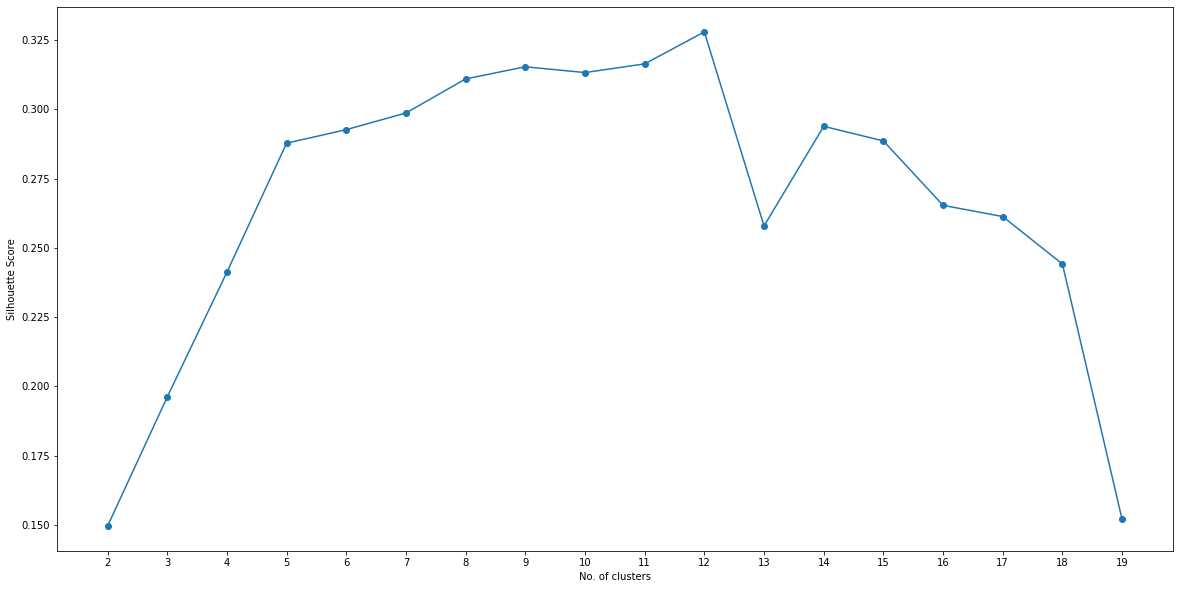

In [172]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [173]:
optimalK = np.argmax(scores) + 2 # Finds the optimal value of K for our algorithm
optimalK

12

# Run KMeans for our optimal cluster number

In [181]:
raleigh_grouped.reset_index(inplace = True)
kclusters = optimalK

# Run k-means clustering
kgc = raleigh_grouped.drop('Neighborhood Name', 1)
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit(rlc)

In [182]:
kmeans.labels_[0:10] 

array([ 1,  7,  1,  1,  1,  1,  1,  1,  1, 10])

In [186]:
# Add clustering labels
raleigh_grouped.drop('Cluster Labels',1, inplace=True)
raleigh_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [187]:
raleigh_grouped.head()

,Cluster Labels,level_0,index,Neighborhood Name,ATM,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,1,0,0,Anderson Heights,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,7,1,1,Asbury,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,1,2,2,Avent West,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,1,3,3,Battery Heights,0.0,0.0,0.026316,0.013158,0.0,0.0,...,0.0,0.0,0.0,0.026316,0.0,0.0,0.0,0.0,0.0,0.026316
4,1,4,4,Belvidere Park,0.0,0.0,0.200000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [192]:
raleigh_merged = raleigh_grouped

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
raleigh_merged = raleigh_merged.join(raleigh_venues.set_index('Neighborhood Name'), on='Neighborhood Name')

raleigh_merged.head() # check the last columns!
raleigh_merged.reset_index(inplace = True, drop= True)

In [193]:
# create map
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(raleigh_merged['Neighborhood Latitude'], raleigh_merged['Neighborhood Longitude'], raleigh_merged['Neighborhood Name'], raleigh_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Analysing clusters 

In [195]:
#Cluster 0
raleigh_merged.loc[raleigh_merged['Cluster Labels'] == 0, raleigh_merged.columns[[1] + list(range(5, raleigh_merged.shape[1]))]]

,level_0,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
234,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.822209,-78.673384,Dominion Materials,35.821506,-78.677562,Construction & Landscaping
308,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.822800,-78.672500,Dominion Materials,35.821506,-78.677562,Construction & Landscaping
1027,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.748110,-78.657646,Deck Masters,35.748661,-78.653518,Construction & Landscaping


In [196]:
#Cluster 1
raleigh_merged.loc[raleigh_merged['Cluster Labels'] == 1, raleigh_merged.columns[[1] + list(range(5, raleigh_merged.shape[1]))]]

,level_0,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.25,0.0,...,0.0,0.0,0.0,0.0,35.808897,-78.648599,NOFO @ the Pig,35.805081,-78.646896,Café
1,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.25,0.0,...,0.0,0.0,0.0,0.0,35.808897,-78.648599,Lilly's Pizza,35.805108,-78.646553,Pizza Place
2,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.25,0.0,...,0.0,0.0,0.0,0.0,35.808897,-78.648599,The Third Place Coffeehouse,35.805076,-78.646515,Coffee Shop
3,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.25,0.0,...,0.0,0.0,0.0,0.0,35.808897,-78.648599,Martian Creations @ MFM,35.806227,-78.649612,Arts & Crafts Store
6,2,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,35.774159,-78.652102,Boulted Bread,35.772535,-78.648729,Bakery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,84,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,35.907351,-78.788882,Skin Sense,35.906062,-78.783900,Spa
1102,84,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,35.907351,-78.788882,Bruegger's Bagels,35.908749,-78.784017,Bagel Shop
1103,84,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,35.907351,-78.788882,The Vitamin Shoppe,35.906113,-78.784189,Supplement Shop
1104,84,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,35.907351,-78.788882,Brier Creek Beer Garden,35.905611,-78.784483,Beer Garden


In [197]:
#Cluster 2
raleigh_merged.loc[raleigh_merged['Cluster Labels'] == 2, raleigh_merged.columns[[1] + list(range(5, raleigh_merged.shape[1]))]]

,level_0,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
838,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.890376,-78.725454,Country Trail Monster Hill,35.887561,-78.728022,Trail
1032,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.858446,-78.691060,Hare Snipe Greenway Trail,35.861180,-78.694640,Trail
1054,81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.839502,-78.699351,Crabtree Creek Trailhead,35.843880,-78.699862,Trail


In [198]:
#Cluster 3
raleigh_merged.loc[raleigh_merged['Cluster Labels'] == 3, raleigh_merged.columns[[1] + list(range(5, raleigh_merged.shape[1]))]]

,level_0,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
904,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.782966,-78.599292,Enloe Baseball Field,35.785264,-78.603172,Baseball Field
1046,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.778432,-78.726506,West Raleigh Baseball Fields,35.776704,-78.723842,Baseball Field
1047,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.778432,-78.726506,Gabe Mart (Jack Daniels),35.778977,-78.721196,Convenience Store


In [199]:
#Cluster 4
raleigh_merged.loc[raleigh_merged['Cluster Labels'] == 4, raleigh_merged.columns[[1] + list(range(5, raleigh_merged.shape[1]))]]

,level_0,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
584,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.774084,-78.592578,Raleigh Country Club,35.776125,-78.593349,Social Club
823,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.776287,-78.598044,Raleigh Country Club,35.776125,-78.593349,Social Club
890,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.776300,-78.593500,Raleigh Country Club,35.776125,-78.593349,Social Club


In [206]:
#Cluster 5
raleigh_merged.loc[raleigh_merged['Cluster Labels'] == 5, raleigh_merged.columns[[1] + list(range(5, raleigh_merged.shape[1]))]]

,level_0,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1018,68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.7106,-78.7249,Whispering Hope Farm,35.707176,-78.725426,Farm


In [200]:
#Cluster 6
raleigh_merged.loc[raleigh_merged['Cluster Labels'] == 6, raleigh_merged.columns[[1] + list(range(5, raleigh_merged.shape[1]))]]

,level_0,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
756,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.971334,-78.340679,Floyd's Grocery,35.969076,-78.336626,Grocery Store


In [201]:
#Cluster 7
raleigh_merged.loc[raleigh_merged['Cluster Labels'] == 7, raleigh_merged.columns[[1] + list(range(5, raleigh_merged.shape[1]))]]

,level_0,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.831650,-78.708625,Olde Raleigh Apartments Pool,35.833935,-78.709735,Pool
5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.831650,-78.708625,Highlands Of Olde Raleigh Pool,35.832668,-78.711909,Pool
215,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.914905,-78.741864,Allsdale Dr. Pool,35.915521,-78.744435,Pool
216,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.914905,-78.741864,Dominion Park Playground,35.912247,-78.742439,Playground
217,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.914905,-78.741864,Dominion Park Swimming Pool,35.912247,-78.742439,Pool
218,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.914905,-78.741864,TFS Athletic Fields,35.919129,-78.741629,Soccer Field
219,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.914905,-78.741864,St. Francis Of Assisi Preschool Playground,35.918827,-78.739761,Playground
313,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.861151,-78.614042,"Hardee's Burgaw, NC",35.862877,-78.614456,Burger Joint
314,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.861151,-78.614042,Raleigh Racquet Club Pool,35.858442,-78.615160,Pool
315,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.861151,-78.614042,Whitehall Community Pool,35.863333,-78.609699,Pool


In [202]:
#Cluster 8
raleigh_merged.loc[raleigh_merged['Cluster Labels'] == 8, raleigh_merged.columns[[1] + list(range(5, raleigh_merged.shape[1]))]]

,level_0,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
810,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.886877,-78.601634,Redbox,35.891323,-78.601654,Video Store


In [203]:
#Cluster 9
raleigh_merged.loc[raleigh_merged['Cluster Labels'] == 9, raleigh_merged.columns[[1] + list(range(5, raleigh_merged.shape[1]))]]

,level_0,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
457,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.841301,-78.626098,Eastgate Park,35.839281,-78.623765,Park
458,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.841301,-78.626098,Eastgate Tennis Courts,35.839195,-78.623962,Park
459,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.841301,-78.626098,Eastgate Playground,35.839212,-78.623624,Playground
460,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.841301,-78.626098,The Cabana @ the Winchester,35.844549,-78.629031,Night Market
832,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.765900,-78.633935,Bragg Street Park,35.765980,-78.635979,Park
833,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.765900,-78.633935,Sunbeam Bread and Cakes,35.763076,-78.634668,Bakery
834,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.765900,-78.633935,Stop N Quick - Shell,35.763736,-78.636699,Convenience Store
835,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.765900,-78.633935,"John P. ""Top"" Greene Park and Community Center",35.769577,-78.633461,Park
891,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.752017,-78.607963,Family Dollar,35.753429,-78.611847,Discount Store
892,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.752017,-78.607963,Southgate Park,35.753400,-78.609075,Park


In [204]:
#Cluster 10
raleigh_merged.loc[raleigh_merged['Cluster Labels'] == 10, raleigh_merged.columns[[1] + list(range(5, raleigh_merged.shape[1]))]]

,level_0,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
214,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.911998,-78.637048,Poole Lake,35.910111,-78.638668,Lake


In [205]:
#Cluster 11
raleigh_merged.loc[raleigh_merged['Cluster Labels'] == 11, raleigh_merged.columns[[1] + list(range(5, raleigh_merged.shape[1]))]]

,level_0,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1055,82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.694457,-78.692704,AB Electric Supply,35.695778,-78.69165,Home Service


# Prepare Vijay Nagar and Old Palasia Data for prediction 

In [231]:
indore_data = pd.DataFrame(columns = {"Neighborhood", "Latitude", "Longitude"})
indore_data

,Latitude,Longitude,Neighborhood


In [246]:
indore_data.loc[0] = ("22.7533", "75.8937", "Vijay Nagar")
indore_data.loc[1] = ( "22.7244", "75.8839", "Old Palasia")
indore_data

,Latitude,Longitude,Neighborhood
0,22.7533,75.8937,Vijay Nagar
1,22.7244,75.8839,Old Palasia


In [252]:
indore_venues = getNearByVenues(names= indore_data['Neighborhood'], latitudes=indore_data['Latitude'], longitudes=indore_data['Longitude'])

In [256]:
indore_venues.head()

,Neighborhood Name,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Vijay Nagar,22.7533,75.8937,Chopstick City,22.751427,75.889599,Chinese Restaurant
1,Vijay Nagar,22.7533,75.8937,Sayaji Hotel,22.751315,75.889490,Hotel
2,Vijay Nagar,22.7533,75.8937,McDonald's,22.752086,75.896189,Fast Food Restaurant
3,Vijay Nagar,22.7533,75.8937,Apna Sweets,22.749640,75.895202,Indian Restaurant
4,Vijay Nagar,22.7533,75.8937,Domino's Pizza,22.752000,75.891000,Pizza Place


In [257]:
#getting data as onehot encoded based on venue_category
indore_onehot = pd.get_dummies(indore_venues[['Venue Category']], prefix="", prefix_sep="")
indore_onehot['Neighborhood Name'] = indore_venues['Neighborhood Name'] 
fixed_columns = [indore_onehot.columns[-1]] + list(indore_onehot.columns[:-1])
indore_onehot = indore_onehot[fixed_columns]
indore_onehot.head()

,Neighborhood Name,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Dessert Shop,Fast Food Restaurant,Greek Restaurant,Hot Dog Joint,Hotel,Indian Restaurant,Pizza Place,Plaza,Restaurant,Sandwich Place,Shopping Mall,Snack Place,Tea Room
0,Vijay Nagar,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Vijay Nagar,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Vijay Nagar,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Vijay Nagar,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Vijay Nagar,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [258]:
indore_grouped = indore_onehot.groupby('Neighborhood Name').mean().reset_index()
indore_grouped

,Neighborhood Name,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Dessert Shop,Fast Food Restaurant,Greek Restaurant,Hot Dog Joint,Hotel,Indian Restaurant,Pizza Place,Plaza,Restaurant,Sandwich Place,Shopping Mall,Snack Place,Tea Room
0,Old Palasia,0.142857,0.000,0.047619,0.047619,0.095238,0.000,0.047619,0.047619,0.000,0.190476,0.000,0.095238,0.047619,0.047619,0.047619,0.095238,0.047619
1,Vijay Nagar,0.000000,0.125,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.125,0.375000,0.125,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000


# Analysis Indore in respect to Raleigh

In [262]:
#Taking out the common venues from both indore and raleigh for analysis
a = np.intersect1d(indore_grouped.columns, raleigh_grouped.columns)
print (a)

['Café' 'Chinese Restaurant' 'Clothing Store' 'Coffee Shop' 'Dessert Shop'
 'Fast Food Restaurant' 'Greek Restaurant' 'Hot Dog Joint' 'Hotel'
 'Indian Restaurant' 'Neighborhood Name' 'Pizza Place' 'Plaza'
 'Restaurant' 'Sandwich Place' 'Shopping Mall' 'Snack Place']


In [263]:
raleigh_grouped_clustering1 = raleigh_grouped[a]
raleigh_grouped_clustering1.head()

,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Dessert Shop,Fast Food Restaurant,Greek Restaurant,Hot Dog Joint,Hotel,Indian Restaurant,Neighborhood Name,Pizza Place,Plaza,Restaurant,Sandwich Place,Shopping Mall,Snack Place
0,0.250000,0.0,0.000000,0.250000,0.0,0.000000,0.0,0.0,0.000000,0.0,Anderson Heights,0.25,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,Asbury,0.00,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,Avent West,0.00,0.0,0.0,0.000000,0.0,0.0
3,0.026316,0.0,0.013158,0.026316,0.0,0.013158,0.0,0.0,0.013158,0.0,Battery Heights,0.00,0.0,0.0,0.026316,0.0,0.0
4,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.100000,0.0,Belvidere Park,0.00,0.0,0.0,0.000000,0.0,0.0
